In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('bruno_db.csv')

In [3]:
genre_counts = df['Genre'].value_counts()

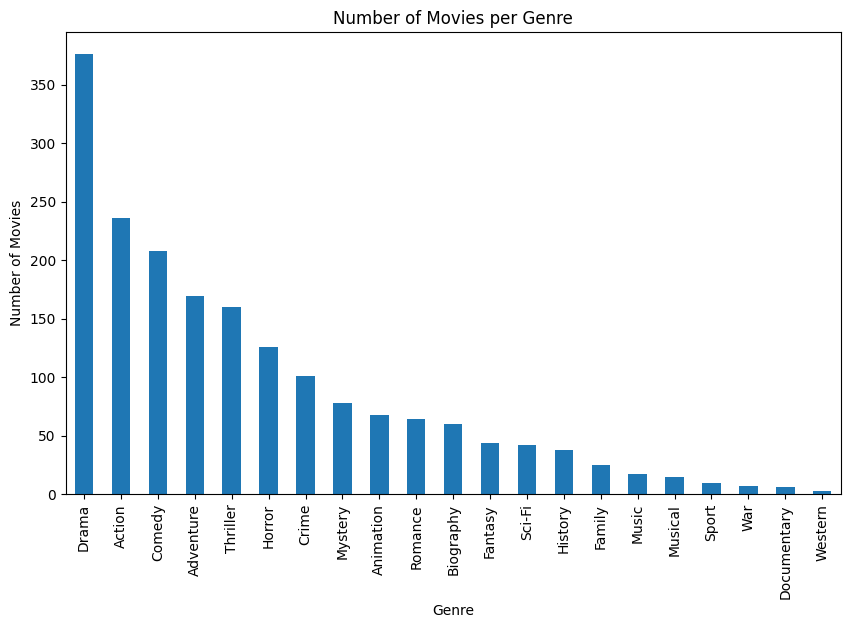

In [4]:
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

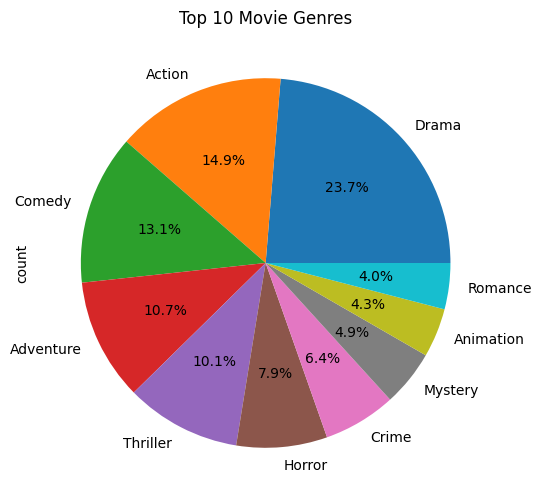

In [5]:
plt.figure(figsize=(10,6))
genre_counts[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Movie Genres')
plt.show()

In [6]:
print(df.columns)

Index(['Title', 'Year', 'BoxOffice', 'budget', 'popularity',
       'production_companies', 'revenue', 'runtime', 'Internet Movie Database',
       'Rotten Tomatoes', 'Metacritic', 'Genre'],
      dtype='object')


In [7]:
production_companies = df.groupby('production_companies').agg({
    'revenue': 'mean',
    'Rotten Tomatoes': 'mean',
    'Internet Movie Database': 'mean'
}).reset_index()

top_earners_production_companies = production_companies.sort_values(by='revenue', ascending=False).head(10)
print(top_earners_production_companies)

                                  production_companies      revenue  \
3        20th Century Studios,Lightstorm Entertainment  2320.250281   
357   Marvel Studios,Pascal Pictures,Columbia Pictures  1921.847111   
519  Skydance Media,Don Simpson/Jerry Bruckheimer F...  1488.732821   
329  LuckyChap Entertainment,Heyday Films,NB/GG Pic...  1445.638421   
596           Universal Pictures,Illumination,Nintendo  1362.000000   
356  Marvel Studios,Maximum Effort,21 Laps Entertai...  1338.073645   
638  Walt Disney Pictures,Walt Disney Animation Stu...  1059.544057   
62             Amblin Entertainment,Universal Pictures  1001.978080   
542  Syncopy,Universal Pictures,Atlas Entertainment...   952.000000   
192                EON Productions,Metro-Goldwyn-Mayer   774.153024   

     Rotten Tomatoes  Internet Movie Database  
3               76.0                     75.0  
357             93.0                     82.0  
519             96.0                     82.0  
329             88.0      

/tmp/ipykernel_9568/840573224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='production_companies', data=top_earners_production_companies, palette='viridis')


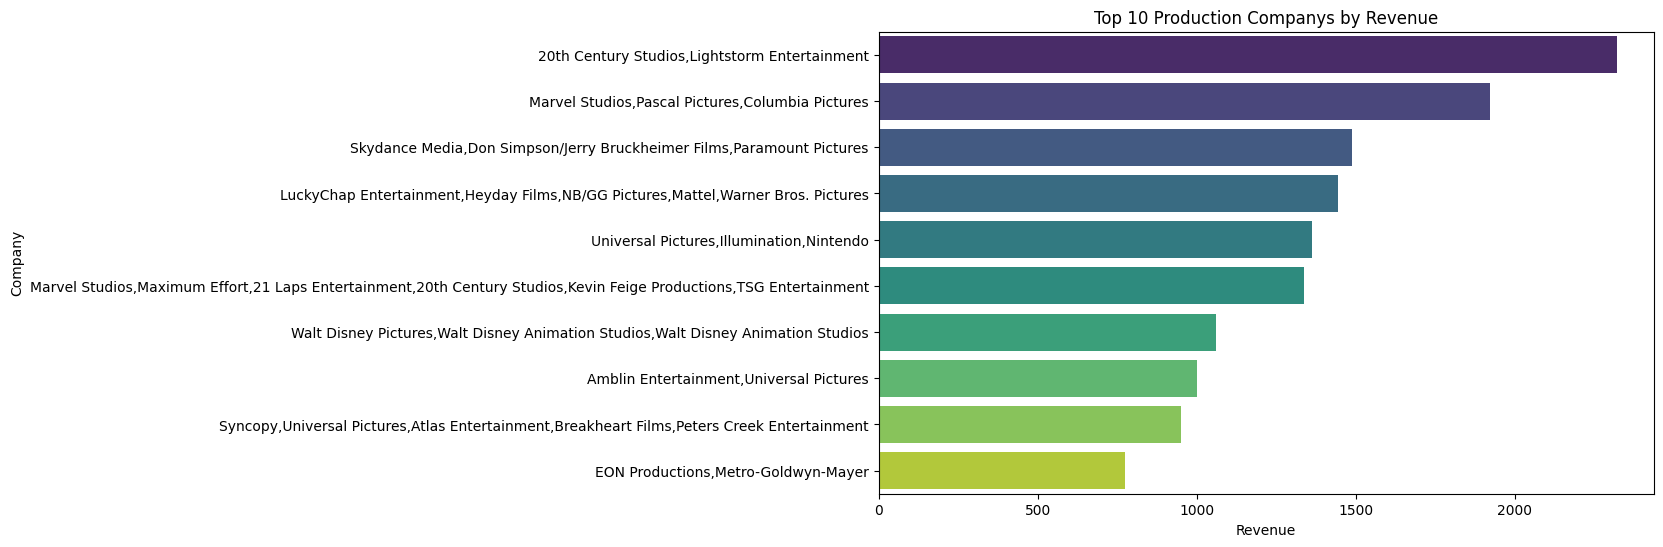

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='production_companies', data=top_earners_production_companies, palette='viridis')
plt.title('Top 10 Production Companys by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Company')
plt.show()

/tmp/ipykernel_9568/123934619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rotten Tomatoes', y='production_companies', data=top_rated_production_companies, palette='viridis')


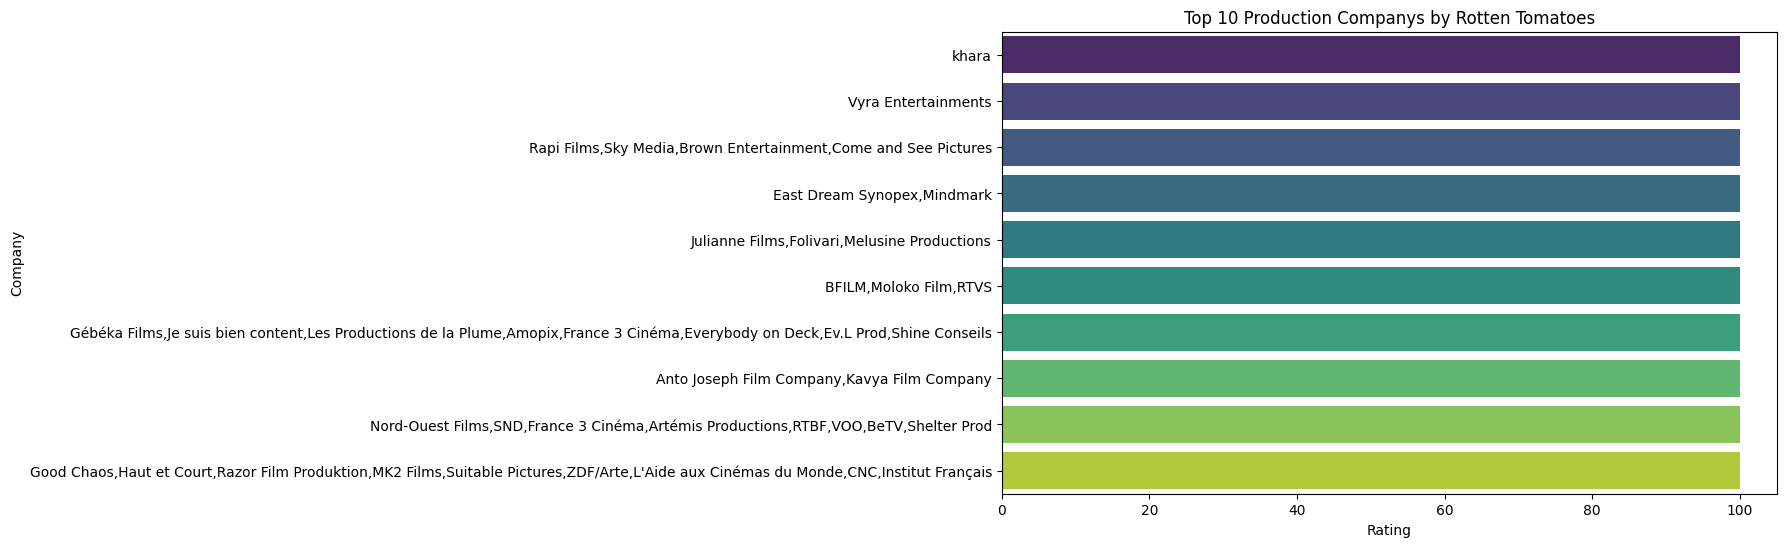

In [9]:
top_rated_production_companies = production_companies.sort_values(by='Rotten Tomatoes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Rotten Tomatoes', y='production_companies', data=top_rated_production_companies, palette='viridis')
plt.title('Top 10 Production Companys by Rotten Tomatoes')
plt.xlabel('Rating')
plt.ylabel('Company')
plt.show()

In [10]:
print(df.columns)

Index(['Title', 'Year', 'BoxOffice', 'budget', 'popularity',
       'production_companies', 'revenue', 'runtime', 'Internet Movie Database',
       'Rotten Tomatoes', 'Metacritic', 'Genre'],
      dtype='object')


/tmp/ipykernel_9568/2021310506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='Genre', data=genre_financial_data, palette='viridis')


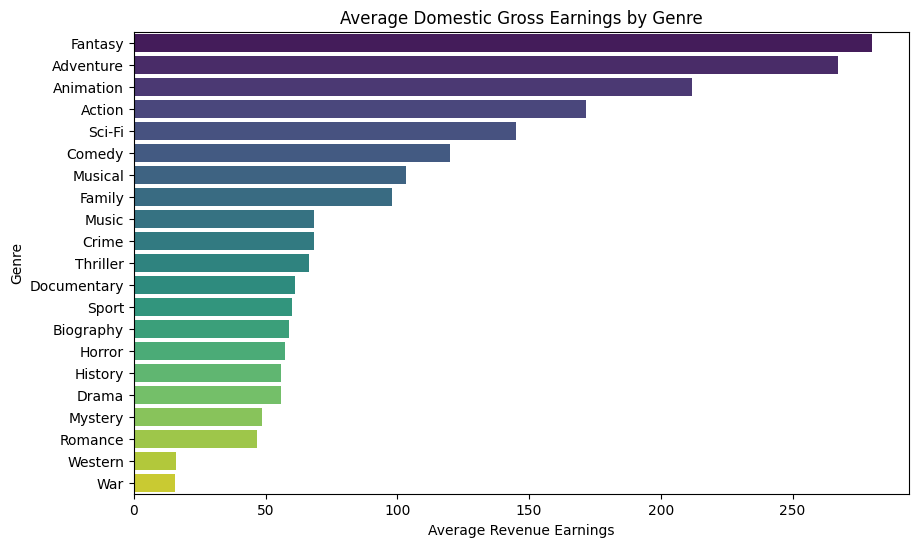

In [11]:
genre_financial_data = df.groupby('Genre').agg({
    'revenue': 'mean'}).reset_index()
genre_financial_data = genre_financial_data.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='Genre', data=genre_financial_data, palette='viridis')
plt.title('Average Domestic Gross Earnings by Genre')
plt.xlabel('Average Revenue Earnings')
plt.ylabel('Genre')
plt.show()

/tmp/ipykernel_9568/1705324362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revenue', y='Genre', data=df, palette='viridis')


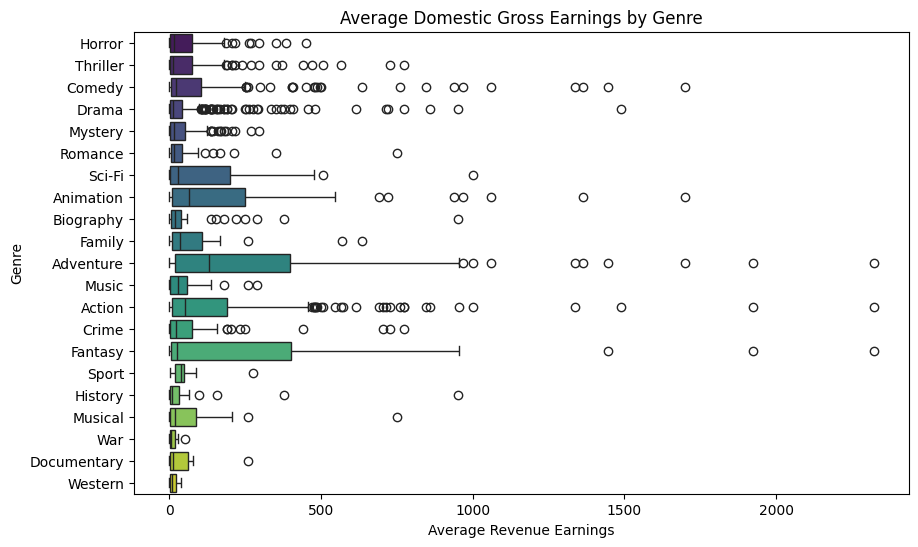

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='revenue', y='Genre', data=df, palette='viridis')
plt.title('Average Domestic Gross Earnings by Genre')
plt.xlabel('Average Revenue Earnings')
plt.ylabel('Genre')
plt.show()

In [13]:
genre_year_data = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
print(genre_year_data)

    Year      Genre  count
0   2021     Action     47
1   2021  Adventure     34
2   2021  Animation     16
3   2021  Biography     11
4   2021     Comedy     29
..   ...        ...    ...
77  2024     Sci-Fi     14
78  2024      Sport      2
79  2024   Thriller     54
80  2024        War      2
81  2024    Western      1

[82 rows x 3 columns]


In [14]:
genre_year_pivot = genre_year_data.pivot(index='Year', columns='Genre', values='count').fillna(0)
print(genre_year_pivot)

Genre  Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
Year                                                                         
2021     47.0       34.0       16.0       11.0    29.0   23.0          1.0   
2022     55.0       38.0       12.0        9.0    42.0   27.0          1.0   
2023     69.0       54.0       19.0       20.0    78.0   27.0          2.0   
2024     65.0       43.0       21.0       20.0    59.0   24.0          2.0   

Genre  Drama  Family  Fantasy  ...  Horror  Music  Musical  Mystery  Romance  \
Year                           ...                                             
2021    66.0     6.0     11.0  ...    19.0    3.0      6.0     17.0     12.0   
2022    91.0     3.0     11.0  ...    38.0    4.0      1.0     30.0     13.0   
2023   120.0     9.0      9.0  ...    25.0    3.0      5.0     19.0     22.0   
2024    99.0     7.0     13.0  ...    44.0    7.0      3.0     12.0     17.0   

Genre  Sci-Fi  Sport  Thriller  War  Western  
Yea

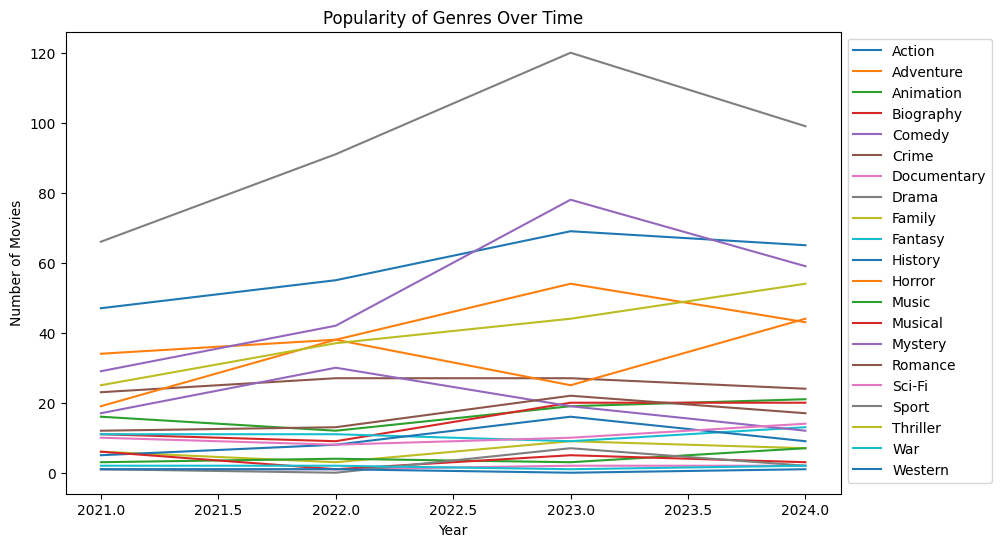

In [15]:
plt.figure(figsize=(10,6))
for genre in genre_year_pivot.columns:
    plt.plot(genre_year_pivot.index, genre_year_pivot[genre], label=genre)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [16]:
genre_data = df.groupby('Genre').agg({
    'Title': 'count',
    'revenue': 'mean'
}).reset_index()
print(genre_data.head())

       Genre  Title     revenue
0     Action    236  171.445860
1  Adventure    169  267.230507
2  Animation     68  211.864665
3  Biography     60   58.978830
4     Comedy    208  120.168738


In [17]:
correlation = genre_data[['Title', 'revenue']].corr()
print(correlation)


          Title  revenue
Title    1.0000   0.1718
revenue  0.1718   1.0000


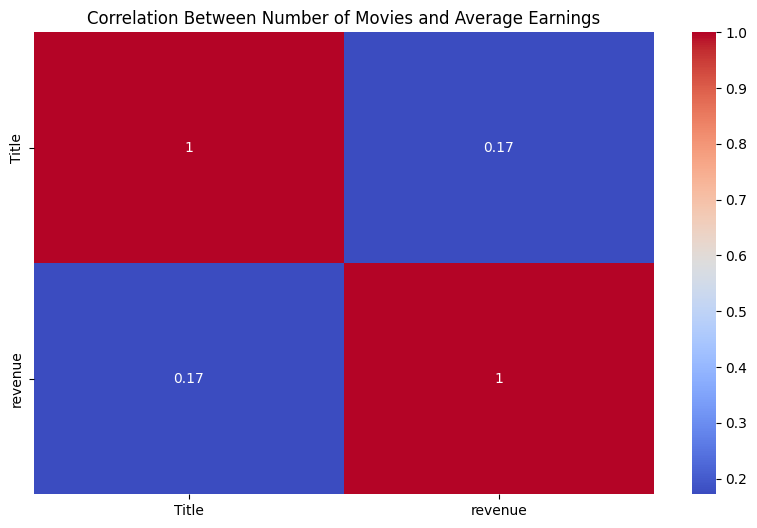

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Number of Movies and Average Earnings')
plt.show()

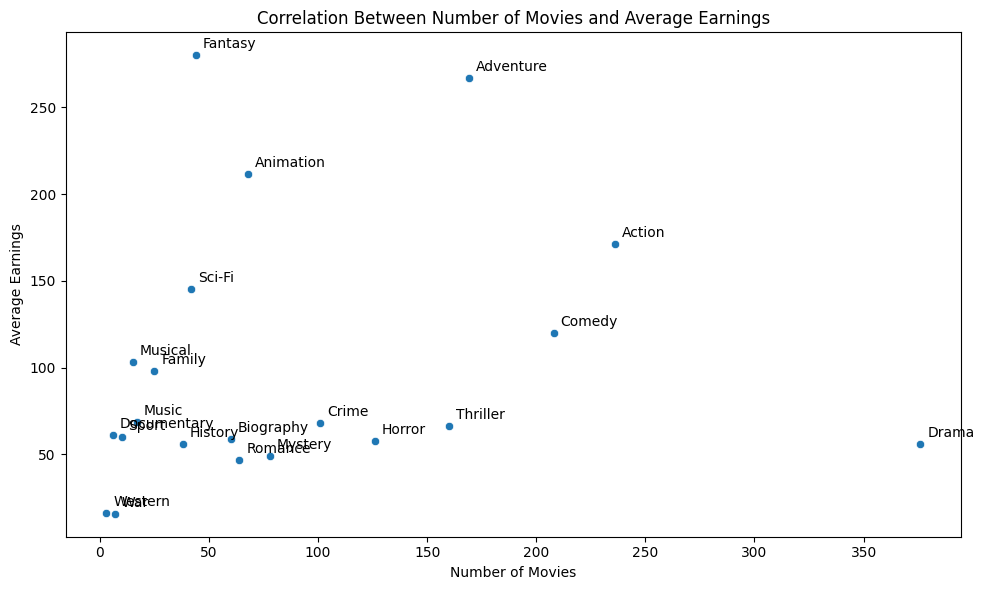

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Title', y='revenue', data=genre_data)

# Add labels for each point
for i, row in genre_data.iterrows():
    plt.annotate(row['Genre'], 
                (row['Title'], row['revenue']),
                xytext=(5, 5),  # 5 pixels offset
                textcoords='offset points')

plt.title('Correlation Between Number of Movies and Average Earnings')
plt.xlabel('Number of Movies')
plt.ylabel('Average Earnings')
plt.tight_layout()
plt.show()

In [20]:

earnings_data = []

# Loop through each genre and append the earnings data to the list
for genre in df['Genre'].unique():
    earnings = df[df['Genre'] == genre]['revenue']
    earnings_data.append(earnings)

# Perform the ANOVA test
f_value, p_value = stats.f_oneway(*earnings_data)

print('F-value:', f_value)
print('P-value:', p_value)



F-value: 9.583747252996544
P-value: 2.309132708377598e-28


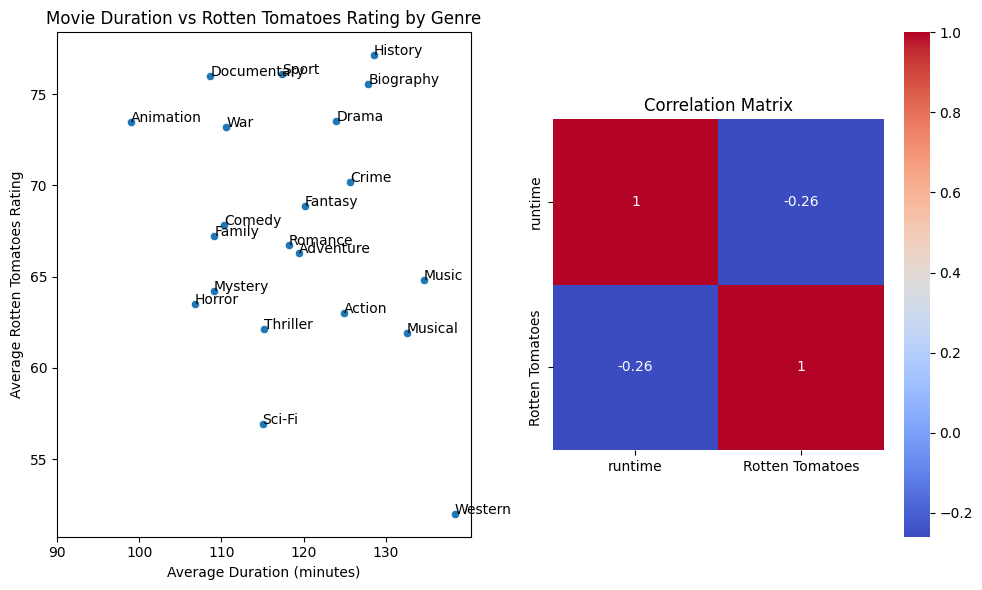


Correlation between Duration and Rotten Tomatoes Rating:
                  runtime  Rotten Tomatoes
runtime          1.000000        -0.259939
Rotten Tomatoes -0.259939         1.000000


In [21]:
genre_rating_duration = df.groupby('Genre').agg({
    'runtime': 'mean',
    'Rotten Tomatoes': 'mean'
}).reset_index()

correlation = genre_rating_duration[['runtime', 'Rotten Tomatoes']].corr()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=genre_rating_duration, x='runtime', y='Rotten Tomatoes')
plt.title('Movie Duration vs Rotten Tomatoes Rating by Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Average Rotten Tomatoes Rating')

min_duration = int(genre_rating_duration['runtime'].min() // 10 * 10)
max_duration = int(genre_rating_duration['runtime'].max() // 10 * 10 + 10)
plt.xticks(np.arange(min_duration, max_duration, 10))

for i, txt in enumerate(genre_rating_duration['Genre']):
    plt.annotate(txt, (genre_rating_duration['runtime'].iloc[i], 
                      genre_rating_duration['Rotten Tomatoes'].iloc[i]))

plt.subplot(1, 2, 2)
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

print("\nCorrelation between Duration and Rotten Tomatoes Rating:")
print(correlation)


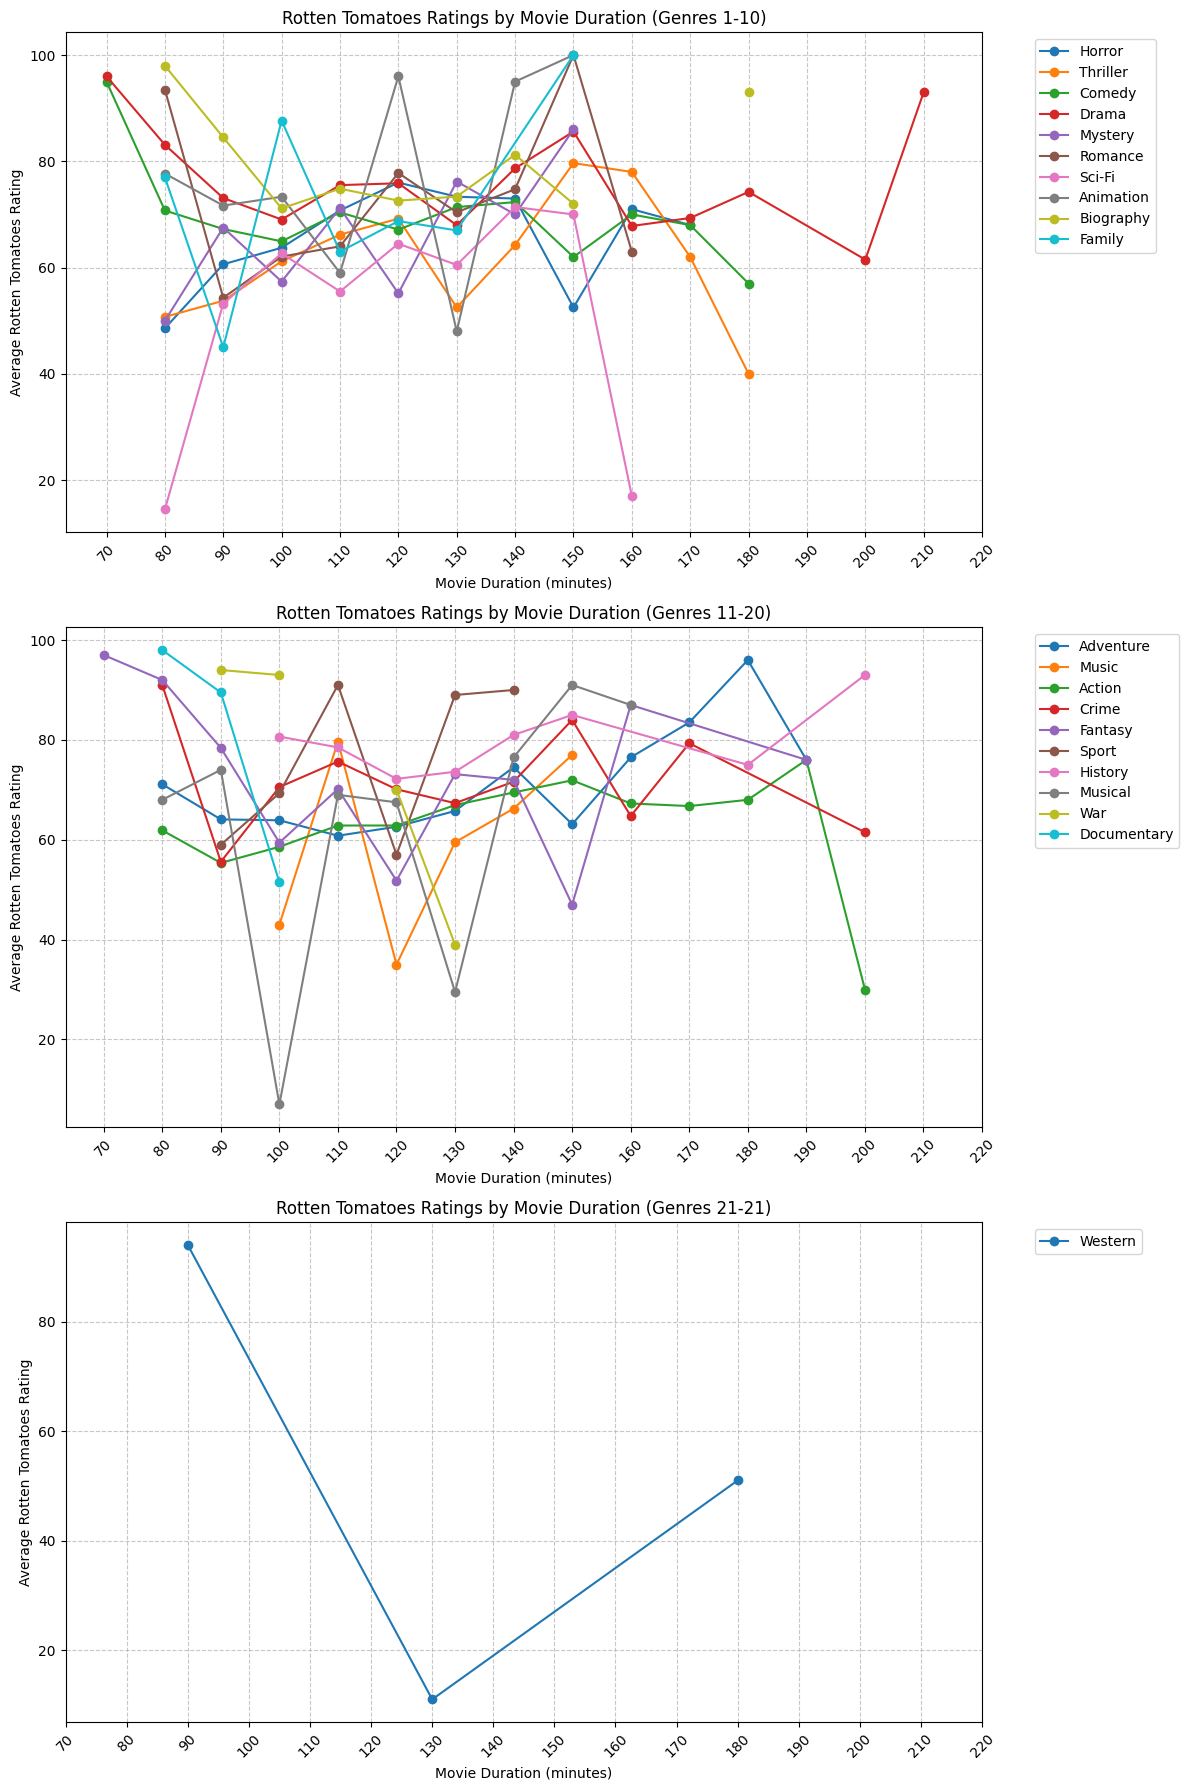

In [22]:
# Create bins for movie duration in 10-minute intervals
df['duration_bin'] = (df['runtime'] // 10 * 10).astype(int)

# Calculate mean Rotten Tomatoes rating for each duration bin and genre
duration_ratings = df.groupby(['duration_bin', 'Genre'])['Rotten Tomatoes'].mean().reset_index()

# Get unique genres and calculate number of subplots needed
genres = df['Genre'].unique()
n_genres = len(genres)
n_subplots = (n_genres + 9) // 10  # Round up to nearest 10

# Create multiple subplots
fig, axes = plt.subplots(n_subplots, 1, figsize=(12, 6*n_subplots))
if n_subplots == 1:
    axes = [axes]

for i in range(n_subplots):
    start_idx = i * 10
    end_idx = min((i + 1) * 10, n_genres)
    current_genres = genres[start_idx:end_idx]
    
    for genre in current_genres:
        genre_data = duration_ratings[duration_ratings['Genre'] == genre]
        axes[i].plot(genre_data['duration_bin'], 
                    genre_data['Rotten Tomatoes'], 
                    marker='o', 
                    label=genre)
    
    axes[i].set_title(f'Rotten Tomatoes Ratings by Movie Duration (Genres {start_idx+1}-{end_idx})')
    axes[i].set_xlabel('Movie Duration (minutes)')
    axes[i].set_ylabel('Average Rotten Tomatoes Rating')
    
    # Set x-axis ticks every 10 minutes
    min_duration = int(df['runtime'].min() // 10 * 10)
    max_duration = int(df['runtime'].max() // 10 * 10 + 10)
    axes[i].set_xticks(np.arange(min_duration, max_duration, 10))
    axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Custo de investimento para os generos